# Tercera ejercitación de Laboratorio de Datos (1er cuatrimestre 2021)


***Fecha de entrega de consigna: 21/5/2021 en horario de clase***

***Fecha de entrega de resolución: 1/6/2021 a las 23:55 PM***

---

# Consigna

El objetivo de este tercer TP es aplicar técnicas de reducción de la dimensión, para luego usar las dimensiones reducidas con el propósito de hacer un clustering de los datos en grupos. Finalmente, usar las etiquetas obtenidas de ese clustering para clasificar nuevos datos. 

Por lo tanto, en la primera parte vamos a usar técnicas de **aprendizaje no supervisado** que nos van a permitir revelar estructura en los datos aún si no tenemos ningún tipo de etiqueta sobre los mismos. Luego, usamos esa información para entrenar un modelo de **aprendizaje supervisado** con el propósito de clasificar nuevos ejemplos. Este tipo de esquema es útil cuando tenemos que desarrollar un clasificador a partir de datos sobre los cuales no conocemos suficiente como para etiquetarlos.

---

En este TP vamos a necesitar el dataset "fashion-mnist" (https://github.com/zalandoresearch/fashion-mnist).

Recordemos que el dataset consta de 70000 imágenes de 28x28 píxeles en escala de grises divididas en 10 clases:

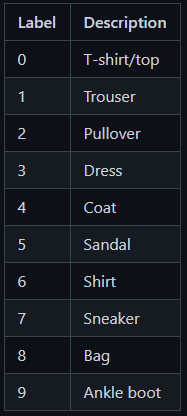


Importo librerías

In [ ]:
# Básicas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# PCA
from sklearn.decomposition import PCA

# Estandarizador
from sklearn.preprocessing import StandardScaler

Cargo los datos

In [ ]:
from keras.datasets import mnist, fashion_mnist

In [ ]:
(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()

# Reshapeo
X_train = X_train_raw.reshape(60000, -1)
X_test = X_test_raw.reshape(10000, -1)

# Transformo a float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizo por el valor máximo
X_train = X_train / 255
X_test = X_test / 255

4431872/4422102 [==============================] - 0s 0us/step


Tengo 784 features y 60000 samples en mi set de entrenamiento.

# 1)

Hago PCA sobre la matriz de datos de entrenamiento.

In [ ]:
# Estandarizo las variables
std_scale = StandardScaler()
std_scale.fit(X_train)
X_train = std_scale.transform(X_train)

In [ ]:
# Creo y ajusto el modelo
pca = PCA(n_components=None)
pca.fit(X_train)
X_pca = pca.transform(X_train)

# 2)

Fracción de varianza explicada y acumulada

Text(0.5, 0, 'Cantidad de componentes principales')

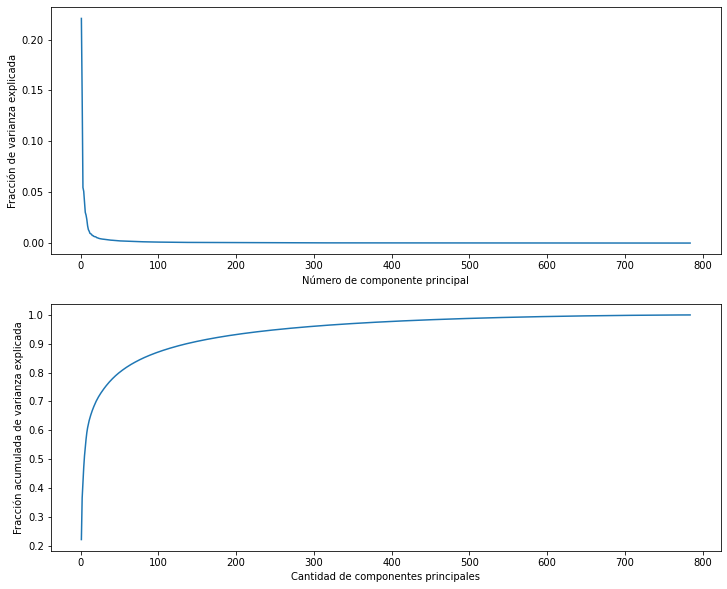

In [ ]:
evr = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(evr)

# Grafico la fracción de varianza que aporta cada componente
# y la información acumulada.
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (12, 10))

ax[0].plot(range(1, len(evr) + 1), evr)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componente principal')

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

# 3)

Visualizo los primeros 5 componentes.

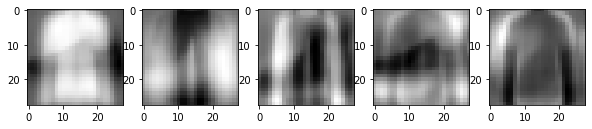

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(10,10))
for i in range(5):
  ax[i].imshow(pca.components_[i].reshape(28, 28), interpolation='none', cmap='gray')

# 4)

Tomo algunas imágenes al azar.

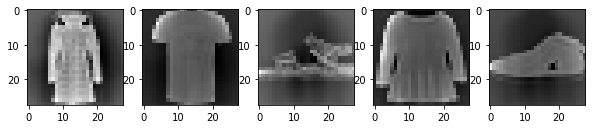

In [ ]:
ids = np.random.randint(len(X_train), size=5)
fig, ax = plt.subplots(1, 5, figsize=(10, 5))
i = 0
for id in ids:
  ax[i].imshow(X_train[id].reshape(28, 28), interpolation='none', cmap='gray')
  i += 1

Las reconstruyo con 2, 10, 25, 50 y 100 componentes.

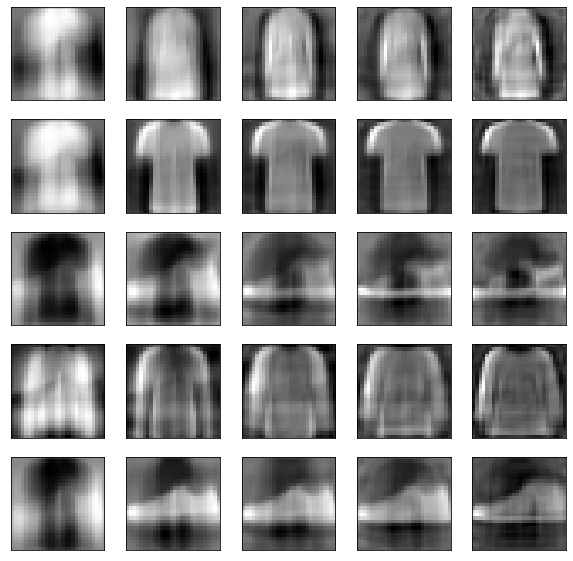

In [ ]:
id = ids[0]
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
j = 0
for p in [2, 10, 25, 50, 100]:
  i = 0
  for id in ids:
      pca = PCA(n_components=p)
      pca.fit(X_train)
      X_pca = pca.transform(X_train)

      X_r = pca.inverse_transform(X_pca)
      ax[i, j].imshow(X_r[id, :].reshape(28, 28), interpolation='none', cmap='gray')

      ax[i, j].set_xticks([])
      ax[i, j].set_yticks([])

      i += 1
  j += 1

# 5)

Hago un scatterplot de la primer y segunda componente.

Text(0, 0.5, 'Segunda componente principal')

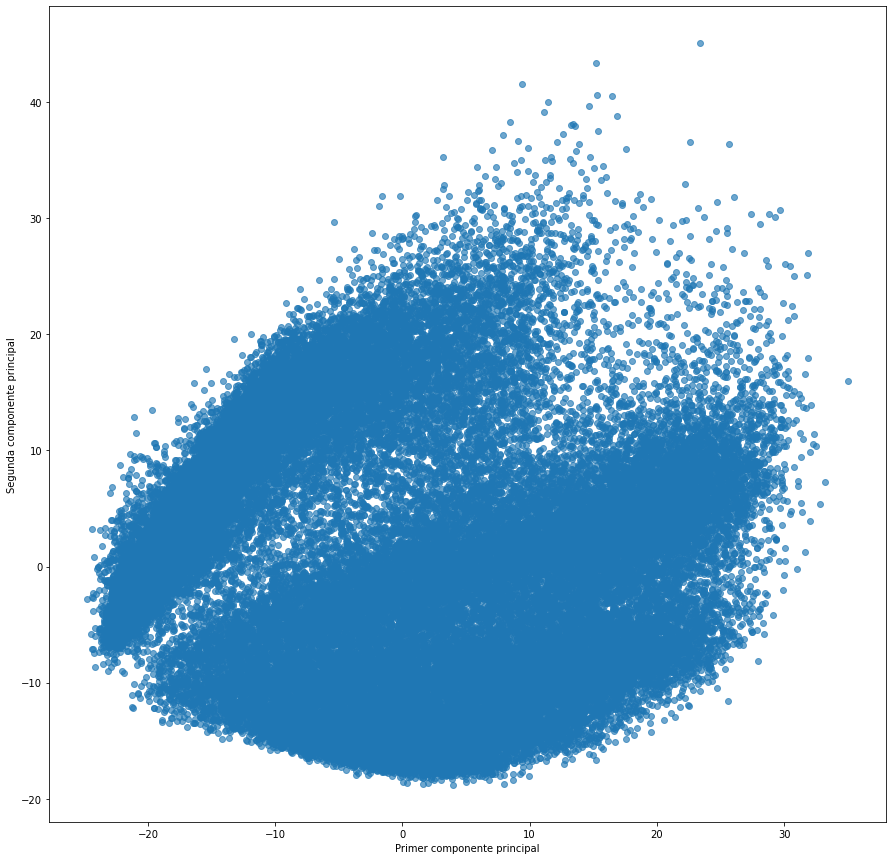

In [ ]:
pca = PCA(n_components=None) # más tarde lo vuelvo a usar.
pca.fit(X_train)
X_pca = pca.transform(X_train)

fig, ax = plt.subplots(figsize = (15, 15))

# Hacemos un scatter de los datos en las dos primeras componentes
ax.scatter(X_pca[:,0], X_pca[:,1], alpha = 0.65)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

# 6)

Hago k-means, con k=2, sobre los datos de la primer y segunda componente.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2) # más tarde lo vuelvo a usar.
kmeans.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Quiero ver donde quedaron los centroides.

Text(0, 0.5, 'Segunda componente principal')

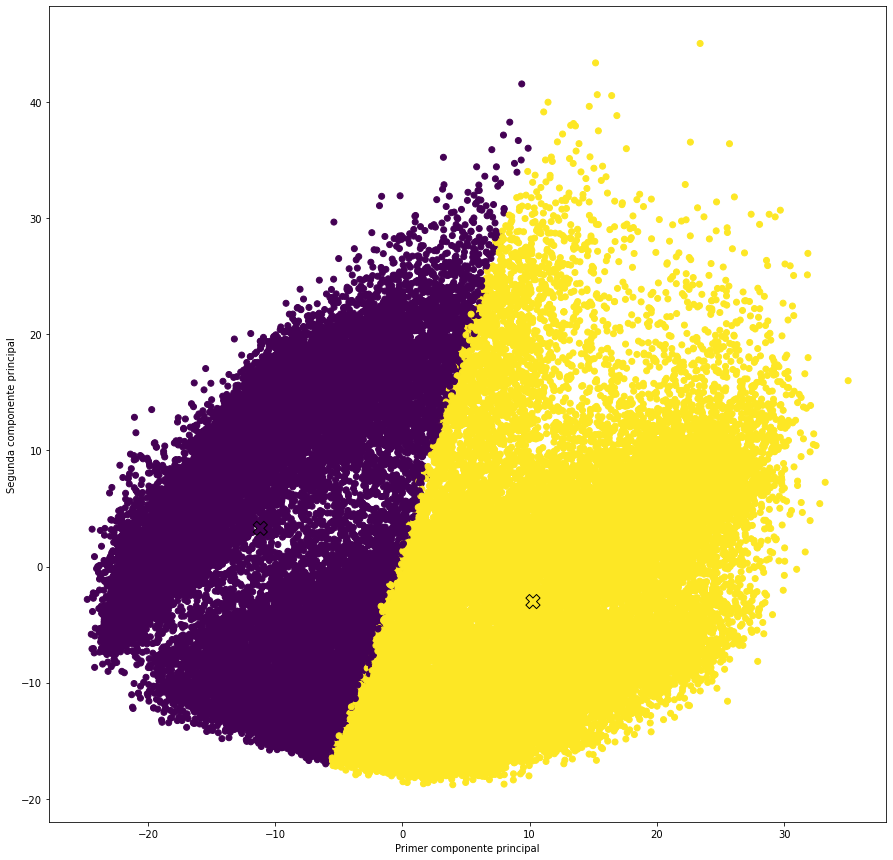

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", s=200, linewidths=1,
           c=np.unique(kmeans.labels_), edgecolors='black')

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

Ahora me gustaría ver qué ropas quedaron en cada cluster.

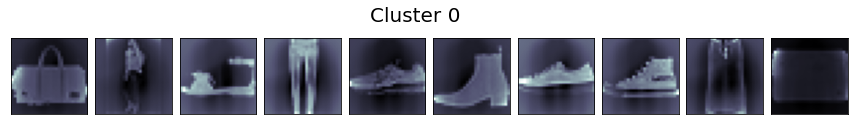

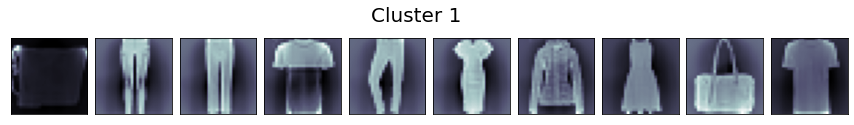

In [ ]:
labels = kmeans.labels_

for i in range(2):
  index = np.nonzero(labels==i)[0]
  index = np.random.choice(index, 10, replace=False)
  num = len(index)
  this_ropa = X_train[index].reshape(len(index), 28, 28)
  fig, axes = plt.subplots(1, num, figsize=(15, 2),
                           subplot_kw={'xticks':[], 'yticks':[]},
                           gridspec_kw=dict(hspace=0.1, wspace=0.1))
  fig.suptitle("Cluster " + str(i), fontsize=20)
  for j, ax in enumerate(axes.flat):
    ax.imshow(this_ropa[j], cmap='bone')

¿A dónde va a parar cada prenda?

In [ ]:
import seaborn as sns

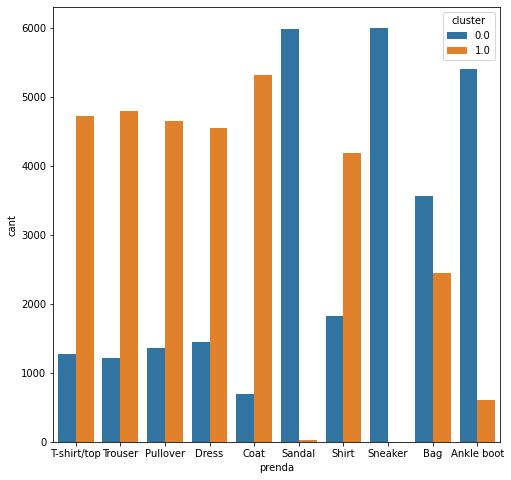

In [ ]:
categories = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

cantEnCluster = pd.DataFrame({'prenda':[], 'cant':[], 'cluster':[]})

for i in range(10):
  index = np.where(y_train == i)
  cluster = kmeans.labels_[index] # cluster al cual pertenece la prenda i
  cantEnCluster = cantEnCluster.append({'prenda':categories[i], 'cant':len(cluster) - np.sum(cluster), 'cluster':0}, ignore_index=True)
  cantEnCluster = cantEnCluster.append({'prenda':categories[i], 'cant':np.sum(cluster), 'cluster':1}, ignore_index=True)

plt.figure(figsize=(8,8))
sns.barplot(x='prenda', y='cant', hue='cluster', data=cantEnCluster, ci=None)

# 7)

Hago KNN, con k=5, usando los datos de X_train y como y_train los ids del clustering.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y_train_knn = kmeans.labels_
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# 8)

Reemplazo a y_test con un vector con la información del histograma de antes.

In [ ]:
categories = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
cluster_0 = [5, 7, 8, 9]
cluster_1 = [0, 1, 2, 3, 4, 6]
y_train_aux = []
for i in y_train:
  if i in cluster_0:
    y_train_aux.append(0)
  else:
    y_train_aux.append(1)
  

# 9)

Aplico KNN a los datos de test, usando las ids 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train_aux)
index = np.random.choice(range(60000), 1000, replace=False)
y_knn = clf.predict(X_train[index]) 

In [ ]:
def TPR_FPR(cm):
  TPR = cm[1,1]/(cm[1,1]+cm[0,1])
  FPR = cm[1,0]/(cm[1,0]+cm[0,0])
  return [TPR,FPR]

In [ ]:
cm = confusion_matrix(np.array(y_train_aux)[index], y_knn)
metricas = TPR_FPR(cm)

print('Matriz de confusion del modelo es:')
print(cm)
print('Tasa de verdaderos positivos: {}'.format(round(metricas[0],4)))  
print('Tasa de falsos positivos: {}'.format(round(metricas[1],4)))  

Matriz de confusion del modelo es:
[[414   5]
 [  2 579]]
Tasa de verdaderos positivos: 0.9914
Tasa de falsos positivos: 0.0048
